In [1]:
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
header = {"user agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"}
url = "https://www.amazon.in/iQOO-Snapdragon-Processor-Supercomputing-Flagship/dp/B07WGPJ82V/?_encoding=UTF8&pd_rd_w=n84kK&content-id=amzn1.sym.727795ad-0950-4cb7-ba31-49c604f26c87&pf_rd_p=727795ad-0950-4cb7-ba31-49c604f26c87&pf_rd_r=QPB10YTZMKKQ9W5KXP23&pd_rd_wg=9HeaP&pd_rd_r=fa30f5c4-bebe-4efd-9648-b92d314e64bb&ref_=pd_gw_dealz_vi&th=1"

In [3]:
response = requests.get(url,headers = header).text

In [4]:
soup = BeautifulSoup(response)


In [5]:
reviews2 = soup.find_all('div',class_ = "a-expander-content reviewText review-text-content a-expander-partial-collapse-content" )

In [49]:
rev = [s.find('span').text for s in reviews2]

In [12]:
rev

['Awesome phone..Probably the best within its segment. Charges very quickly, great battery lasting whole day with moderate to heavy usage. Camera is also great, specially low light capability is great, could have been more consistent with the colors but sometimes it messes up. 2x portrait works like a charm. For performance its one of the best with Snapdragon Gen 2 . I have a iphone 13 also, but I play BGMI on my Iqoo, No heating issues as of now. Very happy with the performance. Speaker quality is also great, Display is awesome for media consumption. You wont regret buying this phone if looks doesnt bother you. Personally I dont like its camera module, its huge.',
 "Excellent display, performance, battery and fast charging but UI is lacking and feels average with pre-installed bloatware but can be removed after tweaking some settings . But UI is smooth . Build quality is sturdy but frame is plastic still feels solid . Speaker sound is not the loudest , need to use full volume most of 

In [28]:
ex = "abcd 456"
for j in range(len(rev)):
    for i in range(len(rev[j])):
        if ord(rev[j][i]) not in range(32 , 126):
            rev[j] = rev[j][:0] + rev[j][i+1:]
            i = i -1

In [32]:
df2 = pd.DataFrame(rev)

In [33]:
df2.rename(columns = {0:'reviews'},inplace = True)

In [34]:
for i in df2:
    print(df2[i])

0    Awesome phone..Probably the best within its se...
1    Excellent display, performance, battery and fa...
2    Firstly i would disclose what i don't like abo...
3    I purchased the IQOO Neo 9 Pro during last mon...
4    I have upgraded to this phone from my 5 year o...
Name: reviews, dtype: object


In [35]:
df2['reviews'][1]

"Excellent display, performance, battery and fast charging but UI is lacking and feels average with pre-installed bloatware but can be removed after tweaking some settings . But UI is smooth . Build quality is sturdy but frame is plastic still feels solid . Speaker sound is not the loudest , need to use full volume most of the time . Other than that all good. I don't use cameras that much but it's good enough for normal users , good enough for this price . A good case ( giftkart ) will do the job for protection. It also comes with screen protector pre-installed. A 3.5mm jack would've been better ."

In [36]:
len(df2['reviews'][0])

669

In [37]:
def stem(data):
    suffixes = ["ing", "ly", "ed", "es", "s"]
    for suf in suffixes:
        if data.endswith(suf):
            return data[:-len(suf)]
    return data   


In [38]:
k = df2['reviews'].apply(stem)

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

for i in df2['reviews']:
    sid = SentimentIntensityAnalyzer()
    scored = sid.polarity_scores(i)
    if scored['neg'] > scored['pos']:
        print('Negative')
    elif scored['pos'] > scored['neg']:
        print('Positive')
    print('\t\n')

Positive
	

Positive
	

Positive
	

Positive
	

Positive
	



In [40]:
from afinn import Afinn
from nltk.tokenize import sent_tokenize
afinn = Afinn()
positive = []
negative = []
neutral = []
for i in df2['reviews']:
    
    tokens =sent_tokenize(i)

    for token in tokens:
        if afinn.score(token) > 0:
            positive.append(token)
        elif afinn.score(token) < 0:
            negative.append(token)
        else:
            neutral.append(token)

    print('Positive sent :',positive)
    print("\t\n")
    print('Negative sent :',negative)
    print("\t\n")
    print('Neutral sent :',neutral)
    print("\t\n")
    

Positive sent : ['Awesome phone..Probably the best within its segment.', 'Charges very quickly, great battery lasting whole day with moderate to heavy usage.', 'Camera is also great, specially low light capability is great, could have been more consistent with the colors but sometimes it messes up.', '2x portrait works like a charm.', 'For performance its one of the best with Snapdragon Gen 2 .', 'Very happy with the performance.', 'Speaker quality is also great, Display is awesome for media consumption.']
	

Negative sent : ['I have a iphone 13 also, but I play BGMI on my Iqoo, No heating issues as of now.', 'You wont regret buying this phone if looks doesnt bother you.', 'Personally I dont like its camera module, its huge.']
	

Neutral sent : []
	

Positive sent : ['Awesome phone..Probably the best within its segment.', 'Charges very quickly, great battery lasting whole day with moderate to heavy usage.', 'Camera is also great, specially low light capability is great, could have been

In [41]:
p = len(positive)
n = len(negative)
ne = len(neutral)

In [42]:
name = ['Positive_Reviews','Negative_Reviews',"Neutral_Reviews"]
rev = [p,n,ne]

In [43]:
def addgraph(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],y[i],ha = 'center',va = 'bottom')

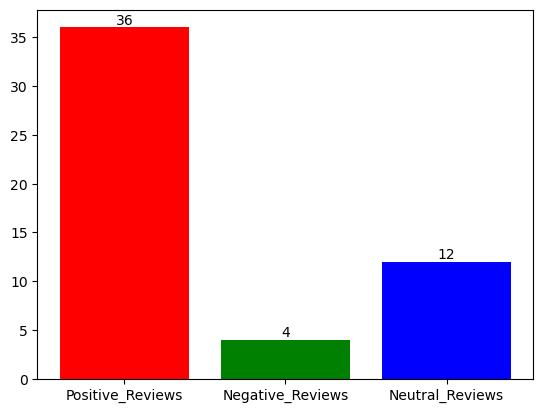

In [44]:
plt.bar(name,rev,color = ['red','green','blue'])
addgraph(name,rev)

In [45]:
from afinn import Afinn
from nltk.tokenize import word_tokenize
afinn = Afinn()
positive1 = []
negative1 = []
neutral1 = []
for i in df2['reviews']:
    
    tokens =word_tokenize(i)

    for token in tokens:
        if afinn.score(token) > 0:
            positive1.append(token)
        elif afinn.score(token) < 0:
            negative1.append(token)
        else:
            neutral1.append(token)

    print('Positive Words :',positive1)
    print("\t\n")
    print('Negative Words :',negative1)
    print("\t\n")
    print('Neutral Words :',neutral1)
    print("\t\n")
    

Positive Words : ['Awesome', 'best', 'great', 'great', 'capability', 'great', 'like', 'charm', 'best', 'happy', 'quality', 'great', 'awesome', 'like', 'huge']
	

Negative Words : ['Charges', 'No', 'regret', 'bother']
	

Neutral Words : ['phone', '..', 'Probably', 'the', 'within', 'its', 'segment', '.', 'very', 'quickly', ',', 'battery', 'lasting', 'whole', 'day', 'with', 'moderate', 'to', 'heavy', 'usage', '.', 'Camera', 'is', 'also', ',', 'specially', 'low', 'light', 'is', ',', 'could', 'have', 'been', 'more', 'consistent', 'with', 'the', 'colors', 'but', 'sometimes', 'it', 'messes', 'up', '.', '2x', 'portrait', 'works', 'a', '.', 'For', 'performance', 'its', 'one', 'of', 'the', 'with', 'Snapdragon', 'Gen', '2', '.', 'I', 'have', 'a', 'iphone', '13', 'also', ',', 'but', 'I', 'play', 'BGMI', 'on', 'my', 'Iqoo', ',', 'heating', 'issues', 'as', 'of', 'now', '.', 'Very', 'with', 'the', 'performance', '.', 'Speaker', 'is', 'also', ',', 'Display', 'is', 'for', 'media', 'consumption', '.', '

In [46]:
p1 = len(positive1)
n1 = len(negative1)
ne1 = len(neutral1)

In [47]:
name = ['Positive_words','Negative_words','Neutral_words']
rev1 = [p1,n1,ne1]

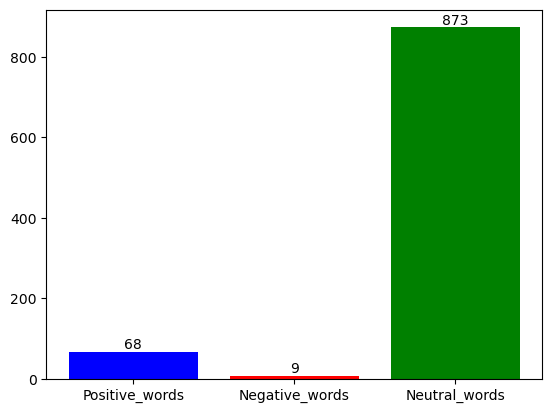

In [48]:
plt.bar(name,rev1,color = ['blue','red','green'])
addgraph(name,rev1)